## Pizza Place Sales

In [ ]:
# importing pandas as pd, so we get to use it as pd
import pandas as pd

In [ ]:
# joining all the csv files into a single data frame
df1 = pd.read_csv("/content/order_details.csv")
df2 = pd.read_csv("/content/orders.csv")
df3 = pd.read_csv("/content/pizza_types.csv", encoding = "latin1")
df4 = pd.read_csv("/content/pizzas.csv")
df = pd.concat([df1, df2, df3, df4], ignore_index = True)

In [ ]:
# to get the first five columns of data in the data frame
df.head(5)

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,1.0,1.0,hawaiian_m,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,classic_dlx_m,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2.0,five_cheese_l,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2.0,ital_supr_l,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2.0,mexicana_m,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# to get information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70098 entries, 0 to 70097
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  float64
 1   order_id          69970 non-null  float64
 2   pizza_id          48716 non-null  object 
 3   quantity          48620 non-null  float64
 4   date              21350 non-null  object 
 5   time              21350 non-null  object 
 6   pizza_type_id     128 non-null    object 
 7   name              32 non-null     object 
 8   category          32 non-null     object 
 9   ingredients       32 non-null     object 
 10  size              96 non-null     object 
 11  price             96 non-null     float64
dtypes: float64(4), object(8)
memory usage: 6.4+ MB


In [ ]:
# to get the number of rows and columns
df.shape

(70098, 12)

In [ ]:
# to access the data dictionary
data_dictionary = pd.read_csv("/content/data_dictionary.csv")
data_dictionary

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...
5,order_details,pizza_id,Foreign key that ties the pizza ordered to its...
6,order_details,quantity,Quantity ordered for each pizza of the same ty...
7,pizzas,pizza_id,Unique identifier for each pizza (constituted ...
8,pizzas,pizza_type_id,Foreign key that ties each pizza to its broade...
9,pizzas,size,"Size of the pizza (Small, Medium, Large, X Lar..."


In [ ]:
# to get total sales or revenue
order_details = pd.read_csv("/content/order_details.csv")
pizzas = pd.read_csv("/content/pizzas.csv")
merged = pd.merge(order_details, pizzas, on = "pizza_id")
merged["revenue"] = merged ["quantity"] * merged ["price"]
total_revenue = merged["revenue"].sum()
print(f"Total revenue is: {total_revenue}")

Total revenue is: 817860.05


In [ ]:
# to find the total quantity sold
order_details = pd.read_csv("/content/order_details.csv")
order_details.head()
total_quantity_sold = order_details["quantity"].sum()
total_quantity_sold


np.int64(49574)

In [ ]:
# to find total orders
import pandas as pd
orders = pd.read_csv("/content/orders.csv")
total_orders = len(orders)
total_orders

21350

In [ ]:
# to find how many pizza types they do sell
import pandas as pd
pizza_types = pd.read_csv("/content/pizza_types.csv", encoding = "latin1")
pizza_types.head()
pizza_types.columns


Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')

In [ ]:
number_of_pizza_types = pizza_types["pizza_type_id"].nunique()
number_of_pizza_types

32

In [ ]:
# to find the average price of the pizzas
pizzas = pd.read_csv("/content/pizzas.csv")
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [ ]:
average_price = pizzas["price"].mean()
average_price

np.float64(16.440625)

In [12]:
# to get the peak hours of sales
import pandas as pd
orders = pd.read_csv("/content/orders.csv")
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [13]:
import pandas as pd
hour_of_sales = orders["time"].value_counts()
hour_of_sales

,count
time,
18:49:37,6
21:15:19,5
20:05:12,5
18:53:49,5
12:13:18,5
...,...
18:28:04,1
18:28:05,1
18:36:06,1


In [ ]:
hour_of_sales.sort_index()

,count
time,
09:52:21,1
10:25:19,1
10:34:34,1
10:43:04,1
10:50:46,1
...,...
23:05:08,1
23:05:16,1
23:05:17,1


In [14]:
# to find the total sales made on each day of the week, merged the data sets that has quantity, price and days of the week together
orders = pd.read_csv("/content/orders.csv")
order_details = pd.read_csv("/content/order_details.csv")
pizzas = pd.read_csv("/content/pizzas.csv")
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [16]:
# merge orders with order details to get
merged_details = pd.merge(order_details, orders, on = "order_id")
merged_details

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40
...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54


In [17]:
merged_details2 = pd.merge(merged_details, pizzas, on = "pizza_id")
merged_details2

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00
...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25


In [21]:
# to calculate sales
merged_details2["sales"] = merged_details2["quantity"] * merged_details2["price"]
merged_details2["sales"]

,sales
0,13.25
1,16.00
2,18.50
3,20.75
4,16.00
...,...
48615,16.75
48616,17.95
48617,12.00
48618,20.25


In [23]:
# to get day of the week, first convert date to date-time format
merged_details2["date"] = pd.to_datetime(merged_details2["date"])
merged_details2["date"]

,date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
48615,2015-12-31
48616,2015-12-31
48617,2015-12-31
48618,2015-12-31


In [24]:
# to get the date in day of the week format
merged_details2["day_of_the_week"] = merged_details2["date"].dt.day_name()
merged_details2["day_of_the_week"]

,day_of_the_week
0,Thursday
1,Thursday
2,Thursday
3,Thursday
4,Thursday
...,...
48615,Thursday
48616,Thursday
48617,Thursday
48618,Thursday


In [25]:
# to get total sales per day
sales_per_day = merged_details2.groupby("day_of_the_week")["sales"].sum().sort_values(ascending = False)
sales_per_day

,sales
day_of_the_week,
Friday,136073.90
Thursday,123528.50
Saturday,123182.40
Wednesday,114408.40
Tuesday,114133.80
Monday,107329.55
Sunday,99203.50


In [27]:
# to get top 5 best selling pizzas
pizzas = pd.read_csv("/content/pizzas.csv")
order_details = pd.read_csv("/content/order_details.csv")
pizza_types = pd.read_csv("/content/pizza_types.csv", encoding = "latin1")

In [28]:
# first thing is to merge order details with pizzas
merged_details = pd.merge(order_details, pizzas, on = "pizza_id")
merged_details

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00
...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95
48617,48618,21348,napolitana_s,1,napolitana,S,12.00
48618,48619,21349,mexicana_l,1,mexicana,L,20.25


In [29]:
merged_details2 = pd.merge(merged_details, pizza_types, on = "pizza_type_id")
merged_details2

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [31]:
# now to get 5 top best pizzas
top_five_pizzas = merged_details2.groupby("name")["quantity"].sum().sort_values(ascending = False)
top_five_pizzas.head(5)

,quantity
name,
The Classic Deluxe Pizza,2453
The Barbecue Chicken Pizza,2432
The Hawaiian Pizza,2422
The Pepperoni Pizza,2418
The Thai Chicken Pizza,2371


In [32]:
# to get the sales for each month
orders = pd.read_csv("/content/orders.csv")
order_details = pd.read_csv("/content/order_details.csv")
pizzas = pd.read_csv("/content/pizzas.csv")

In [33]:
# merge orders with order_details
merged_details = pd.merge(order_details, orders, on="order_id")
merged_details

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40
...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54


In [35]:
#merge with pizzas to get prices
merged_details2 = pd.merge(merged_details, pizzas, on="pizza_id")
merged_details2

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00
...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25


In [38]:
# to get sales, which is quantity by price
merged_details2["sales"] = merged_details2["quantity"] * merged_details2["price"]
merged_details2["sales"]

,sales
0,13.25
1,16.00
2,18.50
3,20.75
4,16.00
...,...
48615,16.75
48616,17.95
48617,12.00
48618,20.25


In [39]:
# Convert date to datetime
merged_details2["date"] = pd.to_datetime(merged_details2["date"])
merged_details2["date"]

,date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
48615,2015-12-31
48616,2015-12-31
48617,2015-12-31
48618,2015-12-31


In [40]:
# get the year and month
merged_details2["month"] = merged_details2["date"].dt.to_period("M")
merged_details2["month"]

,month
0,2015-01
1,2015-01
2,2015-01
3,2015-01
4,2015-01
...,...
48615,2015-12
48616,2015-12
48617,2015-12
48618,2015-12


In [43]:
# to group sales by month
sales_by_month = merged_details2.groupby("month")["sales"].sum()
sales_by_month

,sales
month,
2015-01,69793.30
2015-02,65159.60
2015-03,70397.10
2015-04,68736.80
2015-05,71402.75
2015-06,68230.20
2015-07,72557.90
2015-08,68278.25
2015-09,64180.05


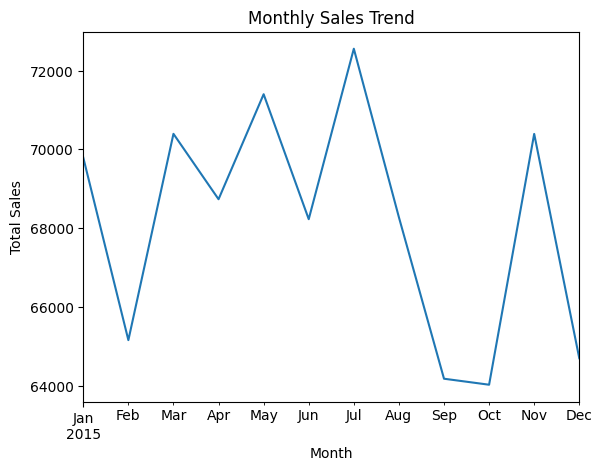

In [44]:
# to check the trends
import matplotlib.pyplot as plt

sales_by_month.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [47]:
# to check if thete are pizzas that are not doing well on the menu
order_details = pd.read_csv("/content/order_details.csv")
pizzas = pd.read_csv("/content/pizzas.csv")
pizza_types = pd.read_csv("/content/pizza_types.csv", encoding = "latin1")

# Merge order_details with pizzas
merged_details = pd.merge(order_details, pizzas, on="pizza_id")

# Merge with pizza_types for full names
merged_details2 = pd.merge(merged_details, pizza_types, on="pizza_type_id")

# Add sales column
merged_details2["sales"] = merged_details2["quantity"] * merged_details2["price"]

In [49]:
# to check the pizzas in terms of sales
sales_per_pizza = merged_details2.groupby("name")["sales"].sum().sort_values()
sales_per_pizza.head(10)

,sales
name,
The Brie Carre Pizza,11588.50
The Green Garden Pizza,13955.75
The Spinach Supreme Pizza,15277.75
The Mediterranean Pizza,15360.50
The Spinach Pesto Pizza,15596.00
The Calabrese Pizza,15934.25
The Italian Vegetables Pizza,16019.25
The Soppressata Pizza,16425.75
The Chicken Pesto Pizza,16701.75


In [50]:
sales_per_pizza.tail(10)

,sales
name,
The Sicilian Pizza,30940.50
The Four Cheese Pizza,32265.70
The Hawaiian Pizza,32273.25
The Italian Supreme Pizza,33476.75
The Southwest Chicken Pizza,34705.75
The Spicy Italian Pizza,34831.25
The Classic Deluxe Pizza,38180.50
The California Chicken Pizza,41409.50
The Barbecue Chicken Pizza,42768.00
